### **Exercise: Exam Scores Analysis**

**Objective:** Apply measures of central tendency **(mean, median, and mode)** to analyze student performance in an exam.

#### **Step 1: Collect the Data**
A professor records the **exam scores** of 55 university students, each exam
is composed from 1-5, where 1 is the low note and 5 the max note:

```
3.13, 4.05, 4.36, 3.01, 3.41, 2.44, 2.55, 3.27, 4.9 , 3.46, 3.36
2.91, 3.18, 2.67, 1.55, 1.93, 4.12, 2.41, 4.16, 4.29, 3.98, 2.28
3.03, 2.69, 4.6 , 4.51, 1.39, 3.51, 3.52, 4.12, 4.9 , 3.16, 2.96
2.34, 3.81, 1.41, 2.62, 2.76, 4.2 , 4.64, 4.27, 4.16, 3.88, 4.39
1.94, 3.42, 2.43, 4.37, 1.24, 3.66, 1.05, 1.38, 2.37, 3.81, 3.78
```

In [1]:
import numpy as np

In [2]:
notes = np.array([3.13, 4.05, 4.36, 3.01, 3.41, 2.44, 2.55, 3.27, 4.9 , 3.46, 3.36,
       2.91, 3.18, 2.67, 1.55, 1.93, 4.12, 2.41, 4.16, 4.29, 3.98, 2.28,
       3.03, 2.69, 4.6 , 4.51, 1.39, 3.51, 3.52, 4.12, 4.9 , 3.16, 2.96,
       2.34, 3.81, 1.41, 2.62, 2.76, 4.2 , 4.64, 4.27, 4.16, 3.88, 4.39,
       1.94, 3.42, 2.43, 4.37, 1.24, 3.66, 1.05, 1.38, 2.37, 3.81, 3.78])

In [3]:
total_notes = notes.size
print(f'Total Notes: {total_notes}\nNotes type: {notes.dtype}')

Total Notes: 55
Notes type: float64



### **Step 3: Calculate the Mean (Arithmetic Average)**  
The mean is calculated using the formula:  

\[
$\bar{x} = \frac{\sum x_i}{n}$
\]

Where:  

- $\sum x_i$ is the **sum of all exam scores**.  
- $n$ is the **total number of students**.


Calculate the mean exam score. 

In [4]:
def mean(arr:np.array) -> np.float64:
    return np.round(arr.sum() / arr.size,3)

In [5]:
notes_mean = mean(notes)
print(f'The mean is: {notes_mean}')

The mean is: 3.232


### **Step 3: Determine the Median (Middle Value)**  
To find the **median**, follow these steps:  

1. **Sort the exam scores** in ascending order.  
2. **Identify the middle value(s)**:  
   - If $n$ is **odd**, the median is the middle value.  
   - If $n$ is **even**, the median is the **average of the two middle values**.  

Identify the median score.  

In [6]:
def median(arr:np.array) -> np.float64:
    arr.sort()
    length = arr.size
    isOdd = length % 2 != 0
    med = np.mean([arr[length // 2 - 1],arr[length // 2]]) if not isOdd else arr[length // 2]
    return med

In [7]:
notes_median = median(notes)
print(f'The median is: {notes_median}')

The median is: 3.36


### **Step 4: Find the Mode (Most Frequent Score)**  
The mode is the **most frequently occurring** exam score in the dataset.  

1. **Count the frequency of each score.**  
2. **Identify the score(s) that appear most often.**  

Determine the mode of the exam scores.

In [8]:
def mode(arr:np.array) -> np.array:
    values, counts = np.unique(arr, return_counts=True)
    return values[counts == np.max(counts)], counts[counts == np.max(counts)]

In [9]:
notes_mode, frequency = mode(notes)
if notes_mode.size == 1:
    print(f'The mode is {notes_mode[0]} - Frequency : {frequency[0]}')
else:
    print(f'Found {notes_mode.size} modes...')
    for i in range(notes_mode.size):
        print(f'{notes_mode[i]}: {frequency[i]}')

Found 4 modes...
3.81: 2
4.12: 2
4.16: 2
4.9: 2


### **Step 5: Interpretation of Results**  
Once the mean, median, and mode are calculated, answer the following:  

- **Does the mean represent a typical exam score?**  
- **Is the median close to the mean? What does this indicate?**  
- **Does the mode provide useful insights? Are students scoring similarly?**  
- **Does the data suggest that some students perform significantly better or worse than others?**  

In [10]:
import math

def sturgers_distribution(total_data:int)->int:
    k = 1 + 3.322 * np.log10(total_data)
    if int(k) % 2 == 0:
        k =  math.ceil(k)
    else:
        k = math.floor(k)
    return k

In [11]:
def get_intervals_numpy(min_value, max_value, amplitude) -> np.array:
    intervals = np.arange(min_value, max_value, amplitude)
    return np.append(intervals, max_value)

In [12]:
def abs_frqcy(intervals:np.array, data:np.array):
    ocurrencies, edges = np.histogram(data, bins=intervals)
    return ocurrencies, edges

In [13]:
def mindpoint(edges) -> np.array:
    return np.array([np.mean([edges[i], edges[i + 1]]) for i in range(edges.size - 1)])

In [87]:
def mindpoints_by_f(mindpoints:np.array, abs_frequency:np.array) -> np.array:
    return (mindpoints * abs_frequency)

In [14]:
def rel_frqcy(abs_frequency:np.array, total_data:int) -> np.array:
    return abs_frequency / total_data

In [15]:
def cum_frqcy(abs_frequency:np.array) -> np.array:
    return np.cumsum(abs_frequency)

In [92]:
def print_frqcy_table(edges, mindpoints, xf, abs_frequency, rel_frequency, cum_frequency):
    # Definir encabezados con mayor separación
    print("{:<38} {:<18} {:<10} {:<10} {:<15} {:<10}".format("INTERVAL", "x", "f", "xf", "fr", "F"))
    print("-" * 100)  # Separador más ancho
    
    for i in range(edges.size - 1):
        bins = f"[{edges[i]:.2f}, {edges[i+1]:.2f})"  # Formato de intervalo
        print("{:<38} {:<18.3f} {:<10} {:<10.2f} {:<15.4f} {:<10}".format(
            bins, mindpoints[i], abs_frequency[i], xf[i], rel_frequency[i], cum_frequency[i]
        ))

In [80]:
def get_frequency_table(data:np.array)->None:
    max_value = data.max()
    min_value = data.min()
    r = max_value - min_value
    k = sturgers_distribution(data.size)
    a = r / k
    intervals = get_intervals_numpy(min_value, max_value, a)
    abs_frequency, edges = abs_frqcy(intervals, data)
    mindpoints = mindpoint(edges)
    xf = mindpoints_by_f(mindpoints,abs_frequency)
    rel_frequency = rel_frqcy(abs_frequency,data.size)
    cum_frequnecy = cum_frqcy(abs_frequency)
    print_frqcy_table(edges,mindpoints,xf, abs_frequency,rel_frequency,cum_frequnecy)

In [93]:
get_frequency_table(notes)

INTERVAL                               x                  f          xf         fr              F         
----------------------------------------------------------------------------------------------------
[1.05, 1.60)                           1.325              6          7.95       0.1091          6         
[1.60, 2.15)                           1.875              2          3.75       0.0364          8         
[2.15, 2.70)                           2.425              10         24.25      0.1818          18        
[2.70, 3.25)                           2.975              8          23.80      0.1455          26        
[3.25, 3.80)                           3.525              9          31.72      0.1636          35        
[3.80, 4.35)                           4.075              12         48.90      0.2182          47        
[4.35, 4.90)                           4.625              8          37.00      0.1455          55        


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_distribution(data:np.array, median, mean) -> None:
    # create canva
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=True, bins=10, color="royalblue", alpha=0.6)

    # Add lines to median and mean
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean:.2f}")
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median:.2f}")

    # Add labels and title
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title("Data distrubution")
    plt.legend()

    plt.show()

In [40]:
print(f'Mean: {notes_mean}\nMedian: {notes_median}\nModes: {notes_mode}')

Mean: 3.232
Median: 3.36
Modes: [3.81 4.12 4.16 4.9 ]


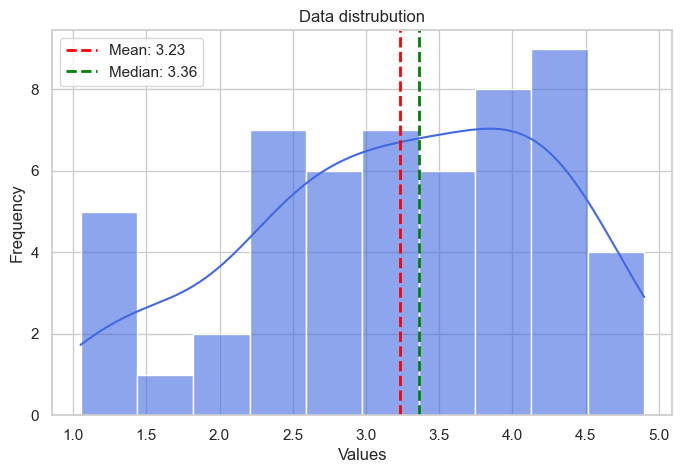

In [42]:
plot_distribution(notes, notes_median, notes_mean)

In [29]:
from scipy.stats import skew

skewness = skew(notes)
print(f"Skewness: {skewness:.4f}")

Skewness: -0.3818


- **Does the mean represent a typical exam score?**
  - **ans**: The mean is slightly lower than the median and mode (3.232 vs. 3.36), suggesting a slight right skew (positively skewed distribution). 
- **Is the median close to the mean? What does this indicate?**  
  - **ans**: The median is slightly upper than the mean, indicates a bias to the right, therefore it can be seen that most students scored above the Average grade. This can be translated, that more than 50% of the course understand the subject.
- **Does the mode provide useful insights? Are students scoring similarly?**  .
  - **ans**: Yes. We found 4 modes, its is a distribuition multimodal and this indicates, that the students scoring are closes and higher.
- **Does the data suggest that some students perform significantly better or worse than others?** 
  - **ans**: The data suggest that more than 50% of get better perfom in their exams.